# 주성분 분석(Principal Component Analysis)
- 데이터의 분산을 최대한 보존하면서 서로 직교하는 새 축을 찾아 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법
- '차원 축소'라고도 불린다.
- 차원수가 너무 많으면 과적합 등 많은 문제가 발생할 수 있음 (머신러닝에서는 특성을 '차원'이라고 부름)
- 주성분 분석은 원본 데이터가 가지고 있는 정보는 최대한 살리면서 특성의 수를 줄여주는 주성분 분석을 실시한다.
- 주성분 분석을 하는 이유: 가장 중요한 특성을 추려내기 위해 사용함  
① 시각화가 용이함  
② 특성이 너무 많아 모델이 잘 학습되지 않는 경우 사용될 수 있음  
③ '다중공선성' 문제가 해결됨 (다중공선성: 독립변수들 간에 강한 상관관계가 나타나는 문제)  
④ 중요 특성만 추출할 수 있음  
- 주성분 분석 과정  
① 각각 2개의 주성분 선정
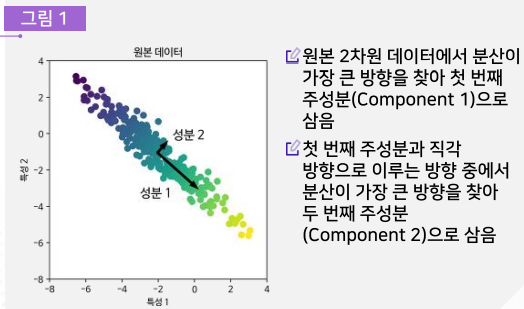
② 선정한 주성분 회전
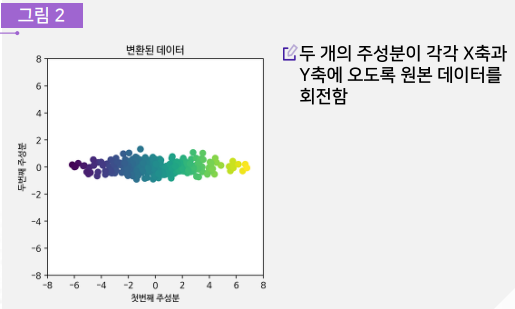
③ 두번째 주성분 제거
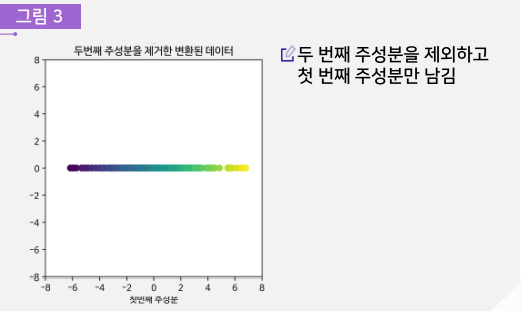
④ 첫번째 주성분 회전
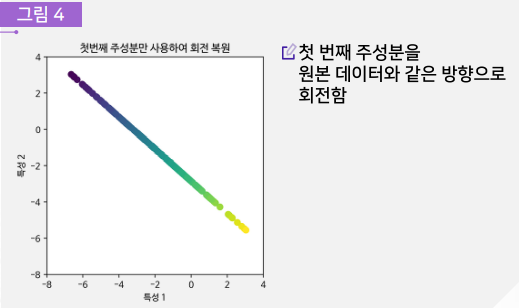
- 성분 수를 선택하는 방법: **"팔꿈치 기법"**  
① 주성분의 개수를 2개 혹은 3개로 설정: 표준화(평균=0, 분산=1)된 데이터를 사용  
② 스크리 도표를 그림: 주성분의 개수를 X축, Eigenvalue를 y축으로 둠  
③ Elbow(팔꿈치): 주성분의 개수가 늘어나면서 갑자기 기울기가 완만해지기 시작하는 부분(꺾이는 부분)을 적절한 주성분의 수라고 할 수 있음  
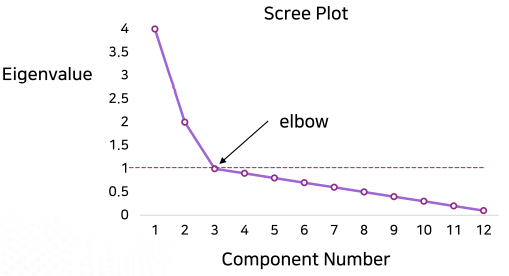
: 주성분 3개에서 기울기가 꺾이므로 1~3개의 주성분을 선택한다.

In [1]:
# 필요한 모듈 로딩 및 데이터 로딩하기
import os
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
# 종양의 양성/악성 여부를 진단하는 cancer 데이터로 주성분 분석을 실시함
dataset = pd.read_csv('E:\\py_temp\\MachineLearning\\cancer.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [2]:
# 데이터 로딩 후, 스케일링
# X,y값 입력
X = dataset.iloc[:,0:30]
y= dataset.iloc[:,30]

# MinMaxScaler를 이용한 데이터 스케일링(전처리)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# X를 기준으로 전처리과정 학습
scaler.fit(X)
# 위에서 학습한 전처리과정 적용
X_scaled = scaler.transform(X)

# 스케일링한 데이터를 기준으로 PCA 모델을 훈련시킴
# 주성분분석 로딩 및 분석
from sklearn.decomposition import PCA
# n_component : 주성분의 갯수. 결과적으로 변수가 몇 개 나오는지에대한 설정이다. default = 2.
pca = PCA(n_components=2)

# X_scaled 기준으로 훈련
pca.fit(X_scaled) 

# explained variance 란 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값임
pca.explained_variance_ratio_

X_pca = pca.transform(X_scaled)

You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Text(0, 0.5, 'Component 2')

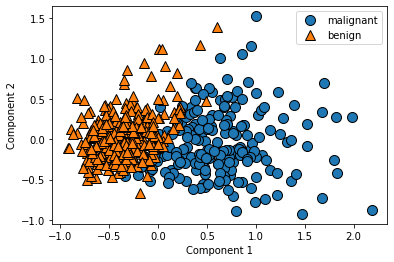

In [3]:
# 결과값 출력
!pip install mglearn
import mglearn
import matplotlib.pyplot as plt
mglearn.discrete_scatter(x1=X_pca[:,0], x2=X_pca[:,1], y=y)
plt.legend(["malignant", "benign"])
plt.xlabel("Component 1")
plt.ylabel("Component 2")

In [4]:
# 특성 수가 30에서 2로 축소된 것을 볼 수 있음
# 차원의 차이로 PCA가 정상 실행되었는지 확인한다
X_pca = pca.transform(X_scaled)
print("원본:",X_scaled.shape)
print("축소본:",X_pca.shape)

원본: (569, 30)
축소본: (569, 2)


In [5]:
# 이번에는 성분의 설정 없이 주성분 분석을 실시한다
# 설정없이 진행하면 성분의 갯수가 max(이 경우에는 30개)로 잡힌다
pca = PCA()

#X_scaled 기준으로 훈련
pca.fit(X_scaled) 

# 주성분 분석결과(explained variance)출력
pca.explained_variance_ratio_

array([5.30915617e-01, 1.72973932e-01, 7.11102190e-02, 6.40676284e-02,
       4.08785540e-02, 3.06570559e-02, 1.58134896e-02, 1.19007722e-02,
       9.88437281e-03, 9.45621263e-03, 8.50058707e-03, 7.56751246e-03,
       6.57471833e-03, 4.75653800e-03, 2.70193936e-03, 2.57909581e-03,
       1.84385368e-03, 1.50831728e-03, 1.38302758e-03, 1.06499071e-03,
       9.85957711e-04, 7.84892118e-04, 5.27348407e-04, 5.13517031e-04,
       4.31778447e-04, 3.30864669e-04, 1.92269877e-04, 5.68969344e-05,
       2.97647547e-05, 8.27649741e-06])

Text(0, 0.5, 'Cumulative Explained Variance')

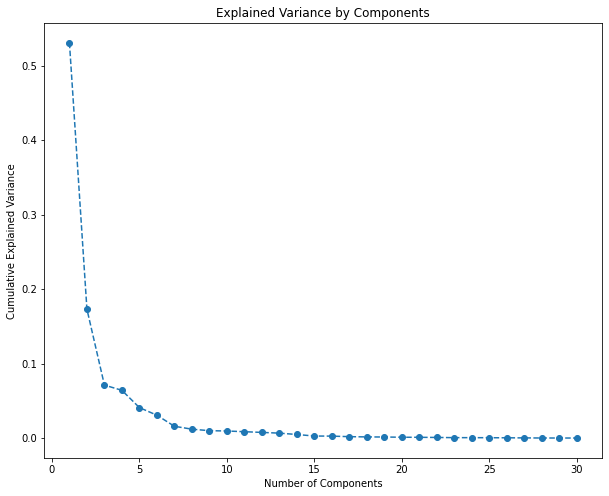

In [6]:
# 앞서 분석한 explained variance를 시각화 해준다
plt.figure(figsize=(10,8))
plt.plot(range(1,31), pca.explained_variance_ratio_, marker='o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel("Cumulative Explained Variance")

#### 머신러닝 속도 증가를 위한 PCA
- 머신러닝 분석을 실시할 때 시간을 포함한 리소스는 중요한 문제
- 적당한 수준의 성능을 살리면서 속도를 빠르게 하기 위해 주성분 분석을 사용

In [7]:
# 분석을 위해 mnist_784 이미지 데이터 불러오기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data,
                                                            mnist.target,
                                                           test_size=1/7.0,
                                                           random_state=0)

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\datasets\_openml.py:64: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [ ]:
# 데이터의 정규화(standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only
scaler.fit(train_img)

# Apply transform to both the training set and the test set
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
# 주성분 변환
# PCA 적용
from sklearn.decompostition import PCA
# 모델 인스턴스 만들어 주기
pca = PCA(.95)
# .95는 전체의 95%를 설명해주는 특성을 살려두겠다는 뜻
# (Variance의 95%를 살려두겠다)

# PCA 모델 훈련
pca.fit(train_img)

# 주성분 변환
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
# 변환 데이터로 성분분석 실시
# 로짓 분석 실시


In [ ]:
①②③④⑤⑥⑦⑧⑨⑩ λ